# Plot SNR distribution and other quality metrics 

The quality metrics are provided in asari feature table.

This notebook was used to generated Fig 6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_table('asari1.10.6_default_full_Feature_table.tsv', header=0, index_col=0, sep='\t')

In [3]:
data

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,neg-12C14N-3-0ev,neg-12C14N-1-0ev,neg-12C14N-2-0ev
id_number,,,,,,,,,,,,,
F1,70.4391,145.86,143.05,148.66,1,5267909,1.00,0.99,1093,3,1736004,1722369,1820536
F2,71.0114,191.32,184.40,198.27,3,5000292,0.51,0.91,67,3,1627905,1744798,1716805
F3,71.0127,146.42,142.48,152.59,5,1190266,1.00,0.90,153,3,499869,342463,374384
F4,108.0217,175.23,168.40,182.11,390,5579951,1.00,0.87,7,3,1824783,3119555,1398007
F5,108.0217,252.69,246.46,257.25,390,2321394,0.61,0.93,5,3,906424,1059858,958475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
F5337,282.0998,144.74,144.18,149.78,4325,1497155,1.00,0.67,261,1,0,1697732,0
F5338,286.2743,145.86,141.33,149.22,4328,2190355,1.00,0.97,328,2,0,1177264,1028098
F5339,298.2386,149.22,146.42,153.72,4336,1543166,1.00,0.96,201,2,0,613352,1033757


In [4]:
data['log2snr'] = np.log2(data['snr'])
data['log2area'] = np.log2(data['peak_area'])
# csel = data['cSelectivity']
# shape = data['goodness_fitting']

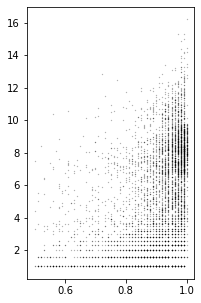

In [9]:
plt.figure(figsize=(3,5))
plt.plot(data['goodness_fitting'], data['log2snr'], 'k.', markersize=0.5, alpha=0.5)

plt.savefig("snr_shape" + ".png")
plt.savefig("snr_shape" + ".pdf")


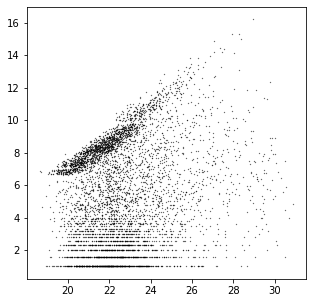

In [26]:

plt.figure(figsize=(5, 5))
plt.plot(data['log2area'], data['log2snr'], 'k.', markersize=0.5)

plt.savefig("snr_area" + ".png")
plt.savefig("snr_area" + ".pdf")


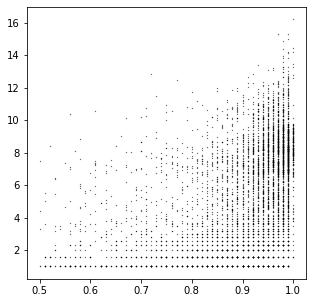

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(data['goodness_fitting'], data['log2snr'], 'k.', markersize=0.5)

plt.savefig("snr_goodness_fitting" + ".png")
plt.savefig("snr_goodness_fitting" + ".pdf")

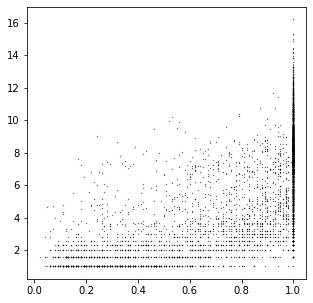

In [28]:
plt.figure(figsize=(5, 5))
plt.plot(data['cSelectivity'], data['log2snr'], 'k.', markersize=0.5)

plt.savefig("snr_cSelectivity" + ".png")
plt.savefig("snr_cSelectivity" + ".pdf")

## Histograms of SNR distri

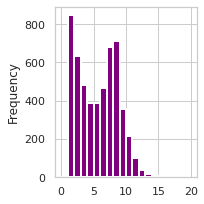

In [103]:
# data.plot('log2snr', kind='hist')
plt.figure(figsize=(3, 3))
data['log2snr'].plot.hist(bins=20, range=(0, 20), color='purple', linewidth=2, log=False, xticks=[0, 5, 10, 15, 20])
plt.tight_layout()
plt.savefig('yeast2021_distr_log2snr.pdf')

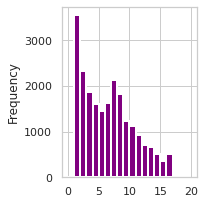

In [102]:
# HZV029 dataset
D29 = pd.read_table('../HZV029/asari_1.10.6_full_Feature_table.tsv', header=0, index_col=0, sep='\t')

D29['log2snr'] = np.log2(D29['snr'])

plt.figure(figsize=(3, 3))
# ylim=(0,3000), 
D29['log2snr'].plot.hist(bins=20, range=(0, 20), color='purple', linewidth=2, log=False, xticks=[0, 5, 10, 15, 20])
plt.tight_layout()
plt.savefig('HZV029q_distr_log2snr.pdf')

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")


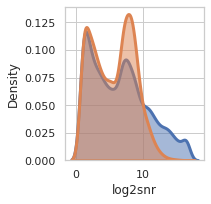

In [104]:
# KED plot
fig, ax = plt.subplots(figsize=(3,3))
sns.kdeplot( data=D29['log2snr'],  ax=ax, fill=True, alpha=.5, linewidth=3)
sns.kdeplot( data=data['log2snr'], ax=ax, fill=True, alpha=.5, linewidth=3)
plt.tight_layout()
plt.savefig('KDE_distr_log2snr_HZV029q_yeast.pdf')

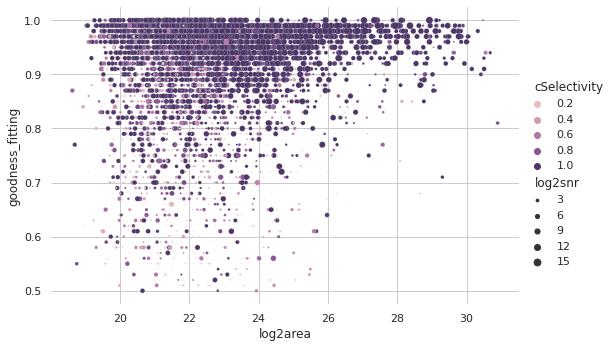

In [114]:
cmap = sns.cubehelix_palette(gamma=0.7, as_cmap=True)

# cmap = sns.light_palette("#5d06e9", as_cmap=True)

g = sns.relplot(
    data=data, x="log2area",
    y="goodness_fitting", 
    hue="cSelectivity",  size="log2snr",
    palette=cmap, sizes=(1, 50),
    height=5, aspect=1.5,
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.savefig('horiz_yeast_sns_metrics.pdf')

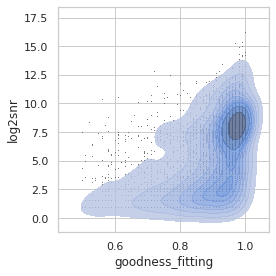

In [14]:
x, y = data['goodness_fitting'], data['log2snr']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=x, y=y,  ax=ax, s=1, color=".15")
sns.kdeplot(x=x, y=y,  ax=ax, fill=True, alpha=.8,)

plt.tight_layout()
            
            #levels=5, color="w", linewidths=1)

plt.savefig("kde_snr_shape" + ".png")
plt.savefig("kde_snr_shape" + ".pdf")

## Summary

Desired data characteristics are high SNR and good peak shape.

Mass selectivity (mSelectivity) is important but built into asari. 

Chromatographic selectivity (mSelectivity) is a safeguard, whereas a low score indicates noisy chromatograph.